# Segmentation EDA Notebook

## Introduction
This notebook contains the preprocessing EDA for the Demographic data.  
It will be the base for the preprocessing steps taken

## Steps contained
1. Missing values handling
2. Duplicates check/ handling
3. Pandas profiling
4. Feature Selection - Too unpopulated columns, multicolinearities (Obtained from profile)
5. Feature Selection - Manual exclusion of variables not relevant businesswise

**Note: To select manually the variables that will be kept, data from the DIAS Information Levels - Attributes Spreadsheet will be used** 

## Context
The targeted company for this project is an Organics company that is selling mail-ordered products.

# Imports

In [38]:
import pandas as pd
import numpy as np
import missingno as msno
from pandas_profiling import ProfileReport

import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(10,5)})

# Reading Data

In [3]:
census = pd.read_csv('data/raw/Udacity_AZDIAS_052018.csv', sep = ';')

C:\Users\LuccaBevilacqua\AppData\Local\Temp\ipykernel_2824\1330055611.py:1: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  census = pd.read_csv('data/raw/Udacity_AZDIAS_052018.csv', sep = ';')


# Type handling on warned columns by Pandas

In [9]:
col_check = census.iloc[:, [18,19]].applymap(type)

In [15]:
census.iloc[:, [18,19]].head(10)

,CAMEO_DEUG_2015,CAMEO_INTL_2015
0,NaN,NaN
1,8.0,51.0
2,4.0,24.0
3,2.0,12.0
4,6.0,43.0
5,8.0,54.0
6,4.0,22.0
7,2.0,14.0
8,1.0,13.0
9,1.0,15.0


Probably, what is happening for the `CAMEO_DEUG_2015`is that not encoded NaN Values are making pandas read the file as `float`.  
This will be temporarily fixed, so the columns can be preprocessed along with the others.  

For the `CAMEO_INTL_2015` column, the values are actually strings. But, since there is no encoding for NaN Values, it will be left as is 

In [11]:
col_check[col_check['CAMEO_DEUG_2015'] != float]

,CAMEO_DEUG_2015,CAMEO_INTL_2015
2048,<class 'str'>,<class 'str'>
2050,<class 'str'>,<class 'str'>
2052,<class 'str'>,<class 'str'>
2053,<class 'str'>,<class 'str'>
2054,<class 'str'>,<class 'str'>
...,...,...
886779,<class 'str'>,<class 'str'>
886780,<class 'str'>,<class 'str'>
886781,<class 'str'>,<class 'str'>
886782,<class 'str'>,<class 'str'>


In [13]:
census.loc[[2048,2050,2052], ['CAMEO_DEUG_2015']]

,CAMEO_DEUG_2015
2048,4
2050,3
2052,7


In [16]:
census['CAMEO_DEUG_2015'].fillna(-1).astype(int)

ValueError: invalid literal for int() with base 10: 'X'

In [23]:
census[census['CAMEO_DEUG_2015'] == 'X'][['CAMEO_DEUG_2015','CAMEO_INTL_2015']].drop_duplicates()

,CAMEO_DEUG_2015,CAMEO_INTL_2015
2511,X,XX


'X's will be treated as `NaN`

In [24]:
census['CAMEO_DEUG_2015'] = census['CAMEO_DEUG_2015'].replace('X',np.nan)

census['CAMEO_INTL_2015'] = census['CAMEO_INTL_2015'].replace('XX',np.nan)

In [26]:
census['CAMEO_DEUG_2015'] = census['CAMEO_DEUG_2015'].fillna(-1).astype(int)

# First Glance on Data

In [27]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int32(1), int64(93), object(5)
memory usage: 2.4+ GB


# Missing Values Handling

## Creating replacements for NaN Values in each column

In [33]:
nan_val_df = pd.read_excel('data/raw/DIAS Attributes - Values 2017.xlsx', header = 1, usecols = 'B:E', dtype = str)

nan_val_df[['Attribute','Description']] = nan_val_df[['Attribute','Description']].fillna(method='ffill')

# Assuming, from manual inspection from the 'Values' Spreadsheet, that NaNs are represented with substrings in Meaning col
nan_val_df = nan_val_df[nan_val_df['Meaning'].str.contains('unknown|no transaction[s]? known',regex=True,na  = False)]

nan_val_df['Value'] = nan_val_df['Value'].str.replace('\s','', regex = True)

nan_val_df['Value'] = nan_val_df['Value'].str.split(',')

nan_val_map = dict(zip(nan_val_df['Attribute'], nan_val_df['Value']))

In [34]:
nested_nan_map = {}

for i, (k, v) in enumerate(nan_val_map.items()):

    nested_nan_map[k] = {int(digit):np.nan for digit in v}

In [35]:
for i, k in enumerate(nested_nan_map):

    print(k, nested_nan_map[k])

    if i == 5:

        break

AGER_TYP {-1: nan}
ALTERSKATEGORIE_GROB {-1: nan, 0: nan}
ALTER_HH {0: nan}
ANREDE_KZ {-1: nan, 0: nan}
BALLRAUM {-1: nan}
BIP_FLAG {-1: nan}


In [37]:
census = census.replace(nested_nan_map)

# First Glance on data
Using Pandas profiling-report on a random sample of the German population

In [45]:
census_sample = census.sample(100000, random_state=5)

In [46]:
report = ProfileReport(census_sample)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\LuccaBevilacqua\anaconda3\envs\arvato\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\LuccaBevilacqua\anaconda3\envs\arvato\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\LuccaBevilacqua\anaconda3\envs\arvato\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\LuccaBevilacqua\anaconda3\envs\arvato\lib\site-packages\pandas_profiling\model\correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(co

KeyboardInterrupt: 

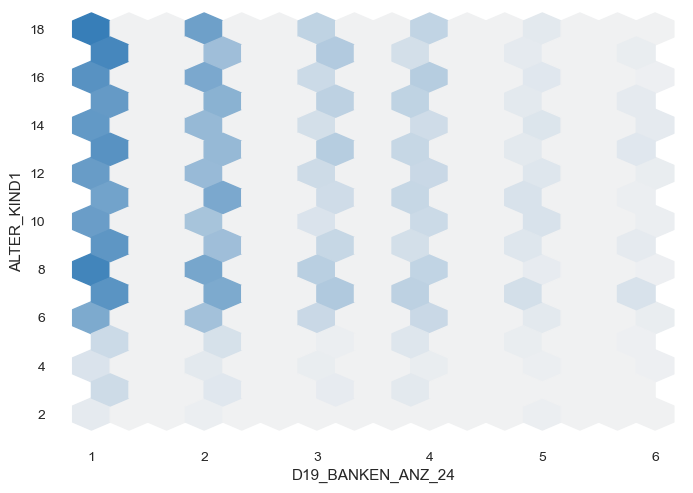

In [47]:
report.to_file('census_report.html')